# Лабораторна робота 3

З генеральної сукупності взято вибірку:

In [1]:
import numpy as np

l = """
0 4 2 0 5 1 1 3 0 2 2 4 3 2 3 3 0 4 5 1
3 1 5 2 0 2 2 3 2 2 2 6 2 1 3 1 3 1 5 4
5 5 3 2 2 0 2 1 1 3 2 3 5 3 5 2 5 2 1 1
2 3 4 3 2 3 2 4 2"""
a = [int(s) for s in l.split()]
an = np.array(a)
an

array([0, 4, 2, 0, 5, 1, 1, 3, 0, 2, 2, 4, 3, 2, 3, 3, 0, 4, 5, 1, 3, 1, 5,
       2, 0, 2, 2, 3, 2, 2, 2, 6, 2, 1, 3, 1, 3, 1, 5, 4, 5, 5, 3, 2, 2, 0,
       2, 1, 1, 3, 2, 3, 5, 3, 5, 2, 5, 2, 1, 1, 2, 3, 4, 3, 2, 3, 2, 4, 2])

абсолютні частоти

In [2]:
import collections
counter = collections.Counter(an)
l_keys = list(counter.keys())
l_values = list(counter.values()) 
print(l_keys)
print(l_values)

[0, 1, 2, 3, 4, 5, 6]
[6, 11, 21, 15, 6, 9, 1]


Варіаційний ряд відносних частот

In [3]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(round(i / len(an), 3))
print(l_rel)

[0, 1, 2, 3, 4, 5, 6]
[6, 11, 21, 15, 6, 9, 1]
[0.087, 0.159, 0.304, 0.217, 0.087, 0.13, 0.014]


Накопичені частоти

In [4]:
cumulative_frequencies = np.cumsum(l_rel).round(3)
cumulative_frequencies

array([ 0.087,  0.246,  0.55 ,  0.767,  0.854,  0.984,  0.998])

Складемо другу статистичну таблицю

In [5]:
l_rel = np.array(l_rel).round(3)
import pandas as pd
x = pd.DataFrame({'Варіанта': range(len(l_keys)), 'Абсолютні частоти': l_values,
                  'Відносні частоти': l_rel, 
                  'Накопичені частоти': cumulative_frequencies})
x

,Абсолютні частоти,Варіанта,Відносні частоти,Накопичені частоти
0,6,0,0.087,0.087
1,11,1,0.159,0.246
2,21,2,0.304,0.550
3,15,3,0.217,0.767
4,6,4,0.087,0.854
5,9,5,0.130,0.984
6,1,6,0.014,0.998


$x_i * n_i$

In [6]:
xi_ni = np.array(l_keys) * np.array(l_values)
xi_ni

array([ 0, 11, 42, 45, 24, 45,  6])

$\lambda$

In [7]:
print(xi_ni.sum())
print(sum(l_values))
lambdaa = xi_ni.sum() / sum(l_values)
lambdaa

173
69


2.5072463768115942

$\lambda_i$

In [8]:
lambda_i = np.power(lambdaa, np.array(l_keys))
lambda_i

array([   1.        ,    2.50724638,    6.28628439,   15.76126377,
         39.51737148,   99.07978647,  248.41743564])

i!

In [9]:
from scipy.special import factorial
factorials = factorial(np.array(l_keys), exact=True)
factorials

array([  1,   1,   2,   6,  24, 120, 720])

$e^h$

In [10]:
np.exp(1)
e_h = np.power(np.full((len(l_keys)), np.exp(1)), lambdaa * -1)
e_h

array([ 0.08149233,  0.08149233,  0.08149233,  0.08149233,  0.08149233,
        0.08149233,  0.08149233])

$P_i$

In [11]:
Pi = lambda_i * e_h / factorials
Pi

array([ 0.08149233,  0.20432135,  0.25614198,  0.21407035,  0.13418178,
        0.06728536,  0.02811683])

Ni`=Ni*Pi

In [12]:
Ni = np.full((len(l_keys)), np.array(sum(l_values))) * Pi
Ni

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(7, array(69)) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


array([  5.62297075,  14.09817304,  17.67379664,  14.7708542 ,
         9.25854267,   4.64268951,   1.94006108])

Ni-Ni`

In [13]:
abs_Ni = np.array(l_values) - Ni
abs_Ni

array([ 0.37702925, -3.09817304,  3.32620336,  0.2291458 , -3.25854267,
        4.35731049, -0.94006108])

Ni-Ni`*Ni-Ni`

In [14]:
abs_Ni_2 = abs_Ni * abs_Ni
abs_Ni_2

array([  0.14215105,   9.59867621,  11.06362877,   0.0525078 ,
        10.61810032,  18.98615469,   0.88371483])

Ni-Ni`*Ni-Ni`/n`i

In [15]:
abs_Ni_2_Ni = abs_Ni_2 / Ni
abs_Ni_2_Ni

array([  2.52804185e-02,   6.80845396e-01,   6.25990499e-01,
         3.55482475e-03,   1.14684359e+00,   4.08947328e+00,
         4.55508766e-01])

In [16]:
abs_Ni_2_Ni.sum()

7.0274967717113723

In [17]:
import math
(abs_Ni_2_Ni.sum() - 2) / math.sqrt(2 * 2)

2.5137483858556862

Вторинна таблиця розподілу: 

In [18]:
x = pd.DataFrame({'Варіанта': range(len(l_keys)), '$x_i * n_i$': xi_ni, '$\lambda^i$': lambda_i, 
                  'i!': factorials, '$e^h$': e_h, '$P_i$': Pi, "$N_i*P_i$": Ni,
                  "Ni-Ni`": abs_Ni, "Ni-Ni`*Ni-Ni`": abs_Ni_2, "Ni-Ni`*Ni-Ni`/n`i": abs_Ni_2_Ni})
x

,$N_i*P_i$,$P_i$,$\lambda^i$,$e^h$,$x_i * n_i$,Ni-Ni`,Ni-Ni`*Ni-Ni`,Ni-Ni`*Ni-Ni`/n`i,i!,Варіанта
0,5.622971,0.081492,1.000000,0.081492,0,0.377029,0.142151,0.025280,1,0
1,14.098173,0.204321,2.507246,0.081492,11,-3.098173,9.598676,0.680845,1,1
2,17.673797,0.256142,6.286284,0.081492,42,3.326203,11.063629,0.625990,2,2
3,14.770854,0.214070,15.761264,0.081492,45,0.229146,0.052508,0.003555,6,3
4,9.258543,0.134182,39.517371,0.081492,24,-3.258543,10.618100,1.146844,24,4
5,4.642690,0.067285,99.079786,0.081492,45,4.357310,18.986155,4.089473,120,5
6,1.940061,0.028117,248.417436,0.081492,6,-0.940061,0.883715,0.455509,720,6


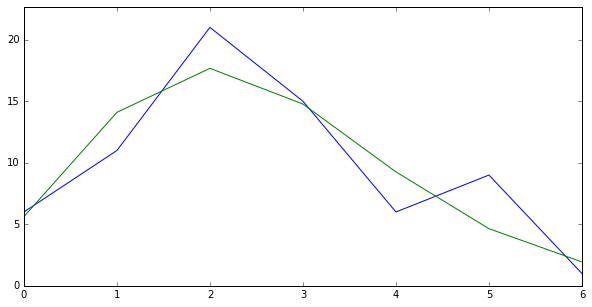

In [22]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 5
plt.xlim(0, len(l_keys) - 1)
plt.ylim(0, max(Ni) + 5)
plt.plot(l_keys, l_values)
plt.plot(l_keys, Ni)
plt.show()